# **Notre méthode de cartoonisation d'images**
Équipe : Lydia YOUNSI, Dorian GERARDIN, Benjamin VILLA

**Importation des bibliothèques**

In [73]:
# OpenCV - image processing library
import cv2

# NumPy - Array and matrix manipulation library
import numpy as np

# Web image loading
from skimage import io

# Colab functions
from google.colab.patches import cv2_imshow
from google.colab import files

**Fonctions outil**

In [74]:
from skimage import io

def open_image_locally(filename):
  img = cv2.imread(filename)
  return img

def open_image_web(address):
  img = io.imread(address)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

In [75]:
import matplotlib.pyplot as plt 

def show_images_as_line(images, columns, figsize):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

**Ouverture de l'image source**

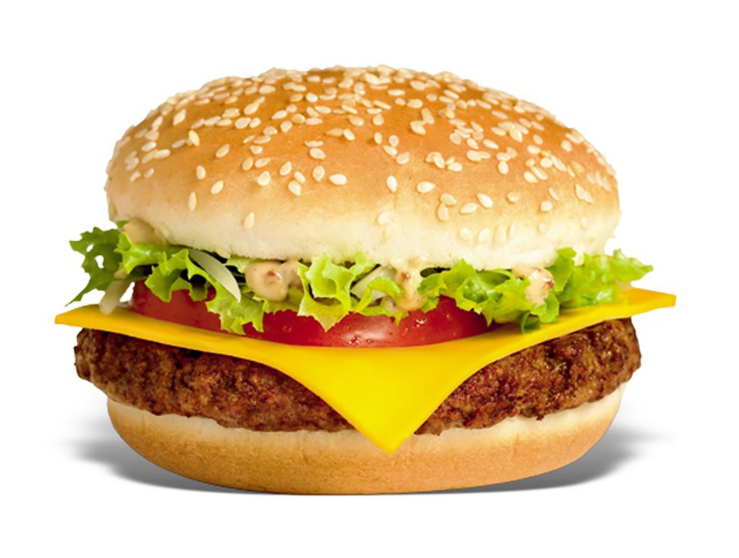

In [76]:
img = open_image_web("https://github.com/DorianGerardin/Cartoon-Images/blob/main/images/quantization/burger/burger.png?raw=true")
show_images_as_line([img],3,(50,10))

**Application d'un filtre bilatéral**

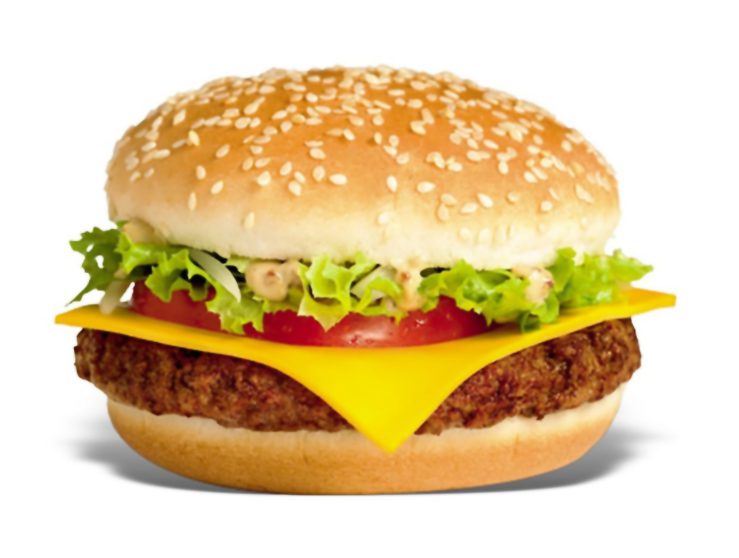

In [77]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
show_images_as_line([blurred],3,(50,10))

**Détection des contours**

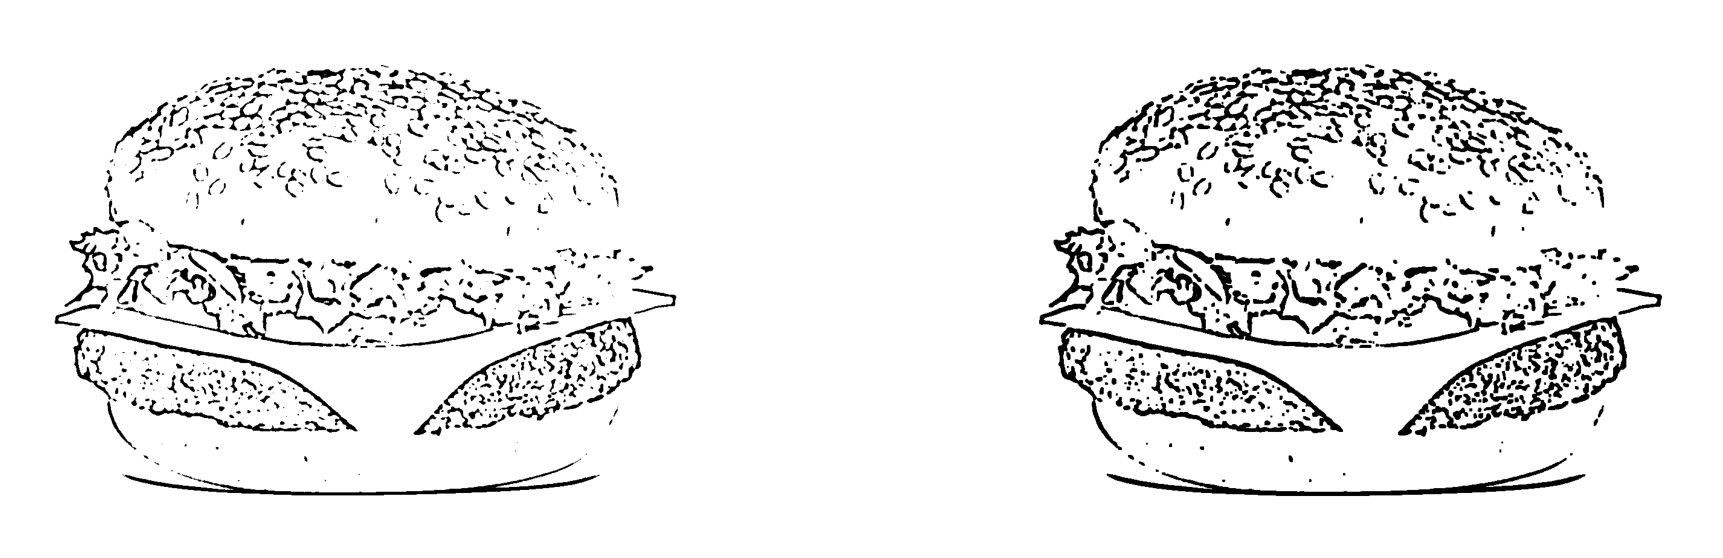

In [78]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.bilateralFilter(gray, d=7, sigmaColor=200,sigmaSpace=200)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

def edge_enhancement(img, nIteration):
  for i in range(nIteration) :
    size = (3, 3)
    shape = cv2.MORPH_RECT
    kernel = cv2.getStructuringElement(shape, size)
    img = cv2.erode(img, kernel)
    if(i == nIteration - 1) :
      return img

line_size = 11
blur_value = 7
edges = edge_mask(blurred, line_size, blur_value)
thickEdges = edge_enhancement(edges, 1)
show_images_as_line([edges,thickEdges],3,(50,10))

**Quantification des couleurs (via k-mean)**

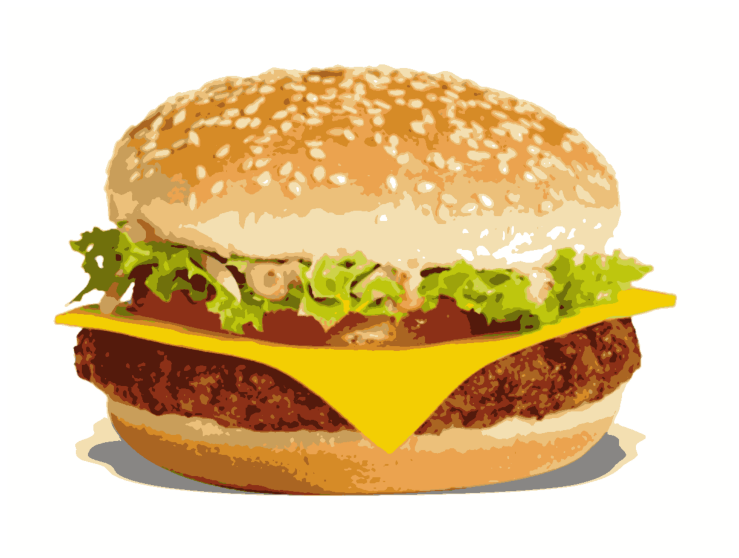

In [79]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.001)
  attempts = 20

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

total_color = 15
image = color_quantization(blurred, total_color)
show_images_as_line([image],3,(50,10))

**Fusion image traitée + contours (2 épaisseurs)**

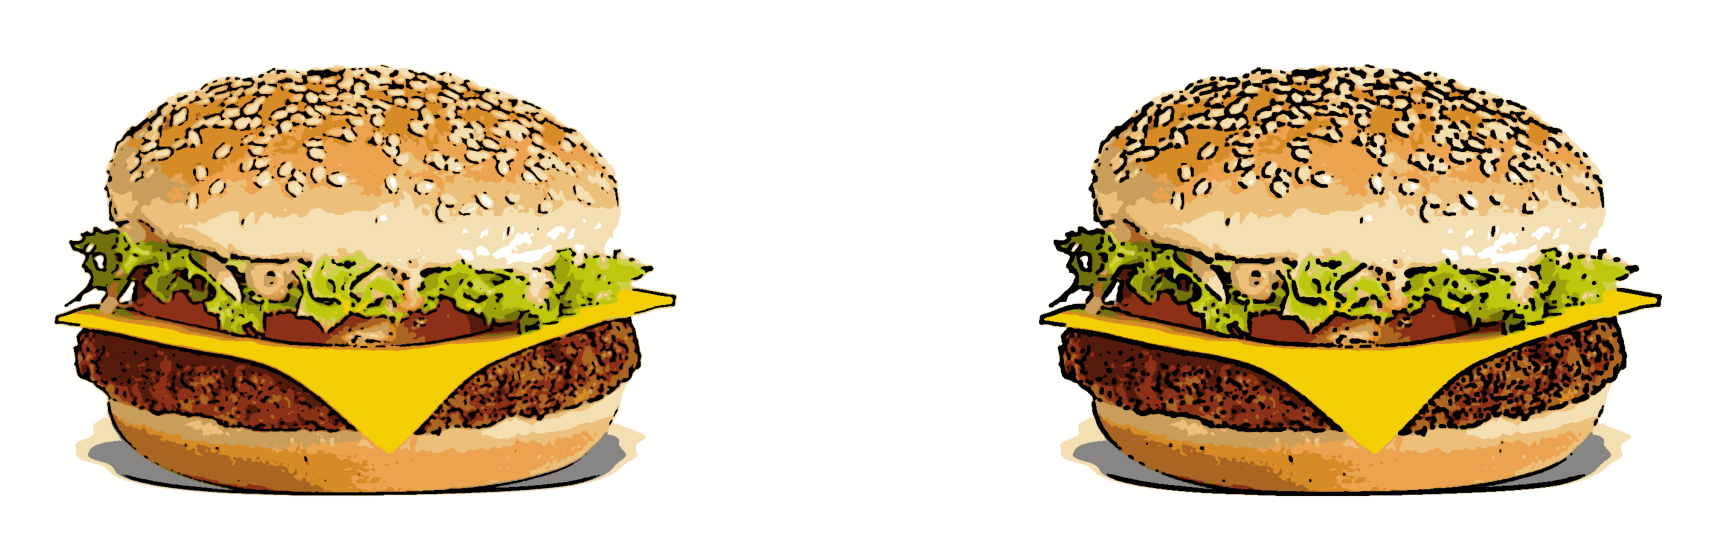

In [80]:
cartoon_thin_edges = cv2.bitwise_and(image, image, mask=edges)
cartoon_thick_edges = cv2.bitwise_and(image, image, mask=thickEdges)
show_images_as_line([cartoon_thin_edges,cartoon_thick_edges],3,(50,10))

# **La méthode standard d'OpenCV**

In [81]:
!pip install cartooner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


centroids: [array([  0.,  90., 105.]), array([  1.,  89., 163., 231.]), array([ 44.,  91., 124., 159., 198., 229., 252.])]


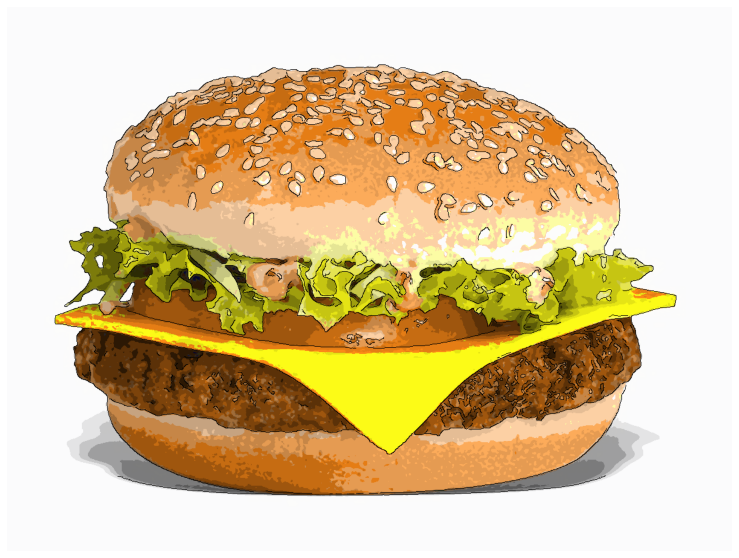

In [83]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os
import time
from cartooner import cartoonize

output = cartoonize(img)
show_images_as_line([output],3,(50,10))

# **Comparaison des deux méthodes**

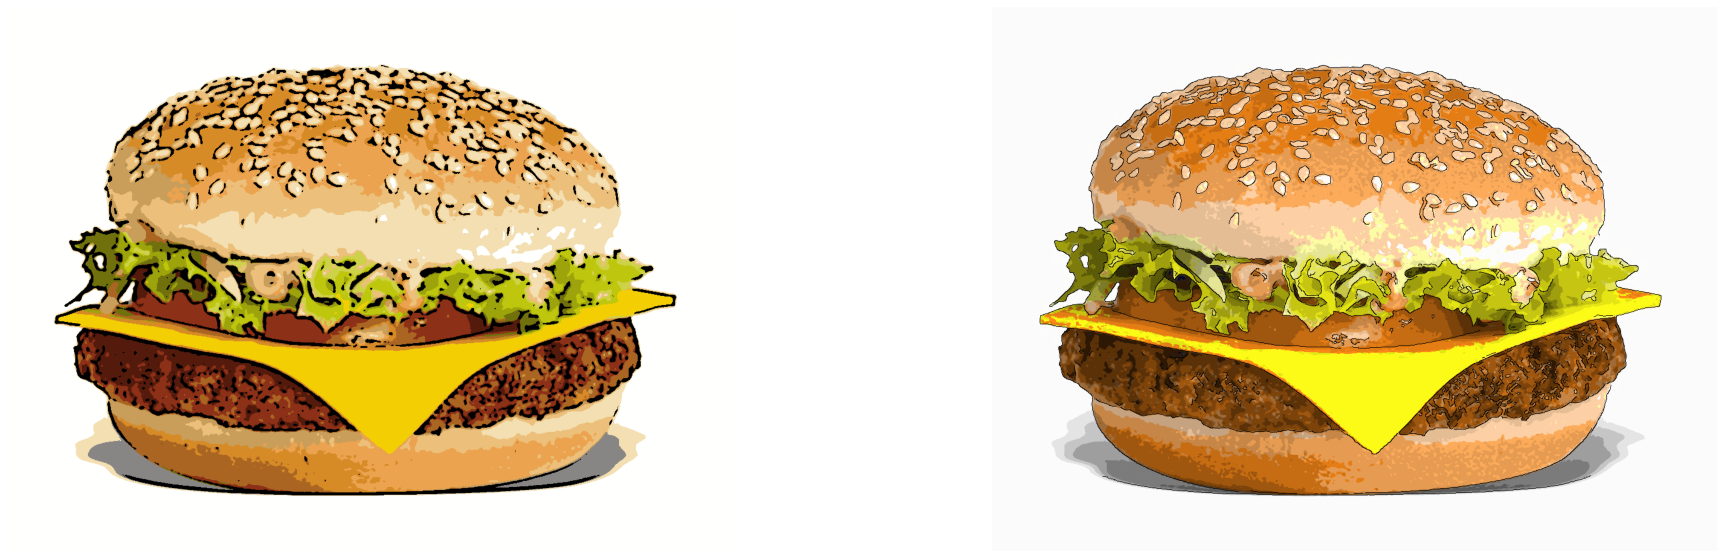

In [84]:
show_images_as_line([cartoon_thin_edges,output],3,(50,10))